In [2]:
# Libraries to display dataframe and images
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inbuilt library to work with textual data
import string

# Setting up the NLTK for preprocessing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

# Downloading required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')  # Corrected typo
nltk.download('universal_tagset')
nltk.download('treebank')

# Configuring Seaborn and Pandas display settings
sns.set_theme(style='darkgrid')
pd.set_option('display.max_columns', 100)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     C


1. Dataset source: towardsdatascience.com
2. Dataset contents: 208 articles with title, article text, author name, reading_time and other attributes
3. Dataset filename: medium_articles_v3

The command shown uses gdown to download from Google Drive:
```bash
!gdown 1MyOEkk_z78P8JL0mTYSerRiPLVf1kVK6
```

The download details show:
```
From: https://drive.google.com/uc?id=1MyOEkk_z78P8JL0mTYSerRiPLVf1kVK6
To: /content/medium_articles_v3.csv
100% 3.13M/3.13M [00:00<00:00, 197MB/s]
```

dataset is: medium_articles_v3

In [4]:
!pip install gdown

In [6]:
!gdown 1MyoEKk_z78P8JL0mTYSzrRipvFlkVK6


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1MyoEKk_z78P8JL0mTYSzrRipvFlkVK6

but Gdown can't. Please check connections and permissions.


In [7]:
# To install datasets from hugging face
! pip install datasets


  Using cached aiohttp-3.11.11-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached aiohappyeyeballs-2.4.4-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached frozenlist-1.5.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
Using cached aiohttp-3.11.11-cp312-cp312-win_amd64.whl (437 kB)
Using cached aiohappyeyeballs-2.4.4-py3-none-any.whl (14 kB)
Using cached aiosignal-1.3.2-py2.py3-none-any.whl (7.6 kB)
Using cached frozenlist-1.5.0-cp312-cp312-win_amd64.whl (51 kB)


In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("fabiochiu/medium-articles")

# Access the train split
train_data = dataset['train']

# Display the first example
print(train_data[0])


In [ ]:
# Save the dataset to a local directory
dataset.save_to_disk("path_to_directory")


In [ ]:
from datasets import load_from_disk

# Load the dataset from the local directory
dataset = load_from_disk("path_to_directory")


In [10]:
!pip install kaggle


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=4c0c155dbdaa703ad3260b645fe5bcbecb478a2e55bfbc89c999837f53d95c2b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [12]:
!kaggle --version


Kaggle API 1.6.17


In [13]:
#!/bin/bash
!kaggle datasets download arnabchaki/medium-articles-dataset


Dataset URL: https://www.kaggle.com/datasets/arnabchaki/medium-articles-dataset
License(s): DbCL-1.0




  0%|          | 0.00/211k [00:00<?, ?B/s]
100%|██████████| 211k/211k [00:00<00:00, 234kB/s]
100%|██████████| 211k/211k [00:00<00:00, 231kB/s]


In [17]:
import zipfile

zip_file_path = r'D:\DEEP LEARNING\04. Shrikant Verma DL\Part 03-Natural Language Processing\S02.NLP-TextRepresentation\medium-articles-dataset.zip'
extract_to_path = r'D:\DEEP LEARNING\04. Shrikant Verma DL\Part 03-Natural Language Processing\S02.NLP-TextRepresentation'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)



In [3]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy

# reading the csv data file
articles = pd.read_csv('medium_data.csv')

display(articles.head(10))
print("Shape of dataframe: {}".format(articles.shape))

,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/not-all-rainbow...,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453.0,11,9,Towards Data Science,27-01-2023
1,2,https://towardsdatascience.com/ethics-in-ai-po...,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311.0,3,12,Towards Data Science,27-01-2023
2,3,https://towardsdatascience.com/python-tuple-th...,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27-01-2023
3,4,https://towardsdatascience.com/dates-and-subqu...,Dates and Subqueries in SQL,Working with dates in SQL,15.0,1,4,Towards Data Science,27-01-2023
4,5,https://towardsdatascience.com/temporal-differ...,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27-01-2023
5,6,https://towardsdatascience.com/numpy-character...,Going Under the Hood of Character-Level RNNs: ...,Due to the recent…,27.0,0,17,Towards Data Science,27-01-2023
6,7,https://uxdesign.cc/chatgpt-isnt-all-it-seems-...,"ChatGPT isn’t all it seems, read this before y...",ChatGPT is an AI…,178.0,2,8,UX Collective,27-01-2023
7,8,https://medium.com/swlh/10-subtle-strategies-i...,10 Subtle Strategies I Wish I Knew When I Had ...,NaN,3200.0,51,6,The Startup,27-01-2023
8,9,https://medium.com/swlh/how-to-start-a-niche-s...,How To Start A Niche Site in Under 3 Hours (Wi...,How to build a niche site in only one hour…,426.0,7,8,The Startup,27-01-2023
9,10,https://medium.com/swlh/dont-become-a-full-tim...,Don’t Become a Full-Time Content Creator If Yo...,A friendly warning before you…,847.0,10,4,The Startup,27-01-2023


Shape of dataframe: (2498, 9)


In [4]:
from pprint import pprint

pprint(articles.iloc[1].to_dict(), compact=True)

{'claps': 311.0,
 'date': '27-01-2023',
 'id': 2,
 'publication': 'Towards Data Science',
 'reading_time': 12,
 'responses': 3,
 'subtitle': 'An alternative approach to understanding bias in\xa0data',
 'title': 'Ethics in AI: Potential Root Causes for Biased Algorithms',
 'url': 'https://towardsdatascience.com/ethics-in-ai-potential-root-causes-for-biased-algorithms-890091915aa3'}


In [5]:
articles.describe(include='all')

,id,url,title,subtitle,claps,responses,reading_time,publication,date
count,2498.000000,2498,2498,2073,2423.000000,2498.000000,2498.000000,2498,2498
unique,NaN,1849,1848,1518,NaN,NaN,NaN,4,70
top,NaN,https://towardsdatascience.com/not-all-rainbow...,Ludic audio and player performance,Weekly curated resources for…,NaN,NaN,NaN,Towards Data Science,04-01-2023
freq,NaN,2,3,7,NaN,NaN,NaN,1228,80
mean,1249.500000,NaN,NaN,NaN,367.353281,5.544035,7.479984,NaN,NaN
std,721.254809,NaN,NaN,NaN,678.886988,12.793039,3.699977,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,625.250000,NaN,NaN,NaN,62.000000,0.000000,5.000000,NaN,NaN
50%,1249.500000,NaN,NaN,NaN,155.000000,2.000000,7.000000,NaN,NaN
75%,1873.750000,NaN,NaN,NaN,381.500000,5.000000,9.000000,NaN,NaN


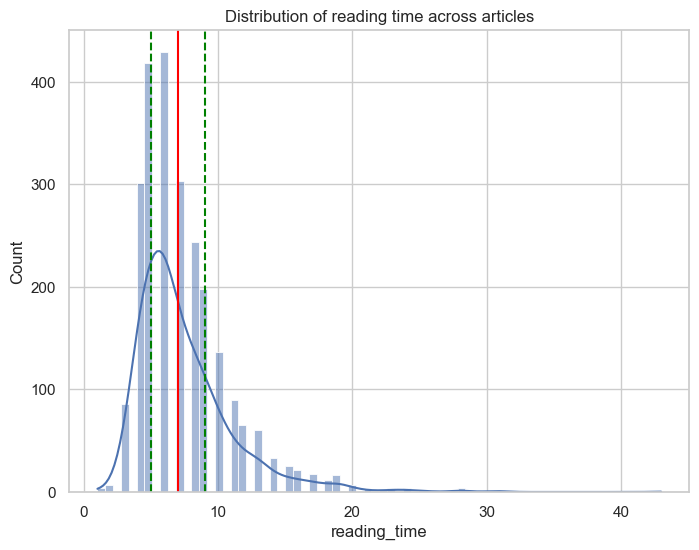

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
# distribution of reading times in our corpus  
fig, axes = plt.subplots(figsize=(8, 6))  

# creating histograms  
sns.histplot(articles["reading_time"], kde=True, ax=axes)  

# Computing percentile of the reading time data  
first_q = np.percentile(articles["reading_time"], 25)  
# Computing median (50th percentile) of the reading time data  
second_q = np.percentile(articles["reading_time"], 50)  
third_q = np.percentile(articles["reading_time"], 75)  

# green lines for 25th and 75th percentile  
plt.axvline(first_q, color="green", linestyle='--')  
# red line for median reading_time  
plt.axvline(second_q, color="red", linestyle='-')  
plt.axvline(third_q, color="green", linestyle='--')  

# plot title  
plt.title("Distribution of reading time across articles")  
plt.show()

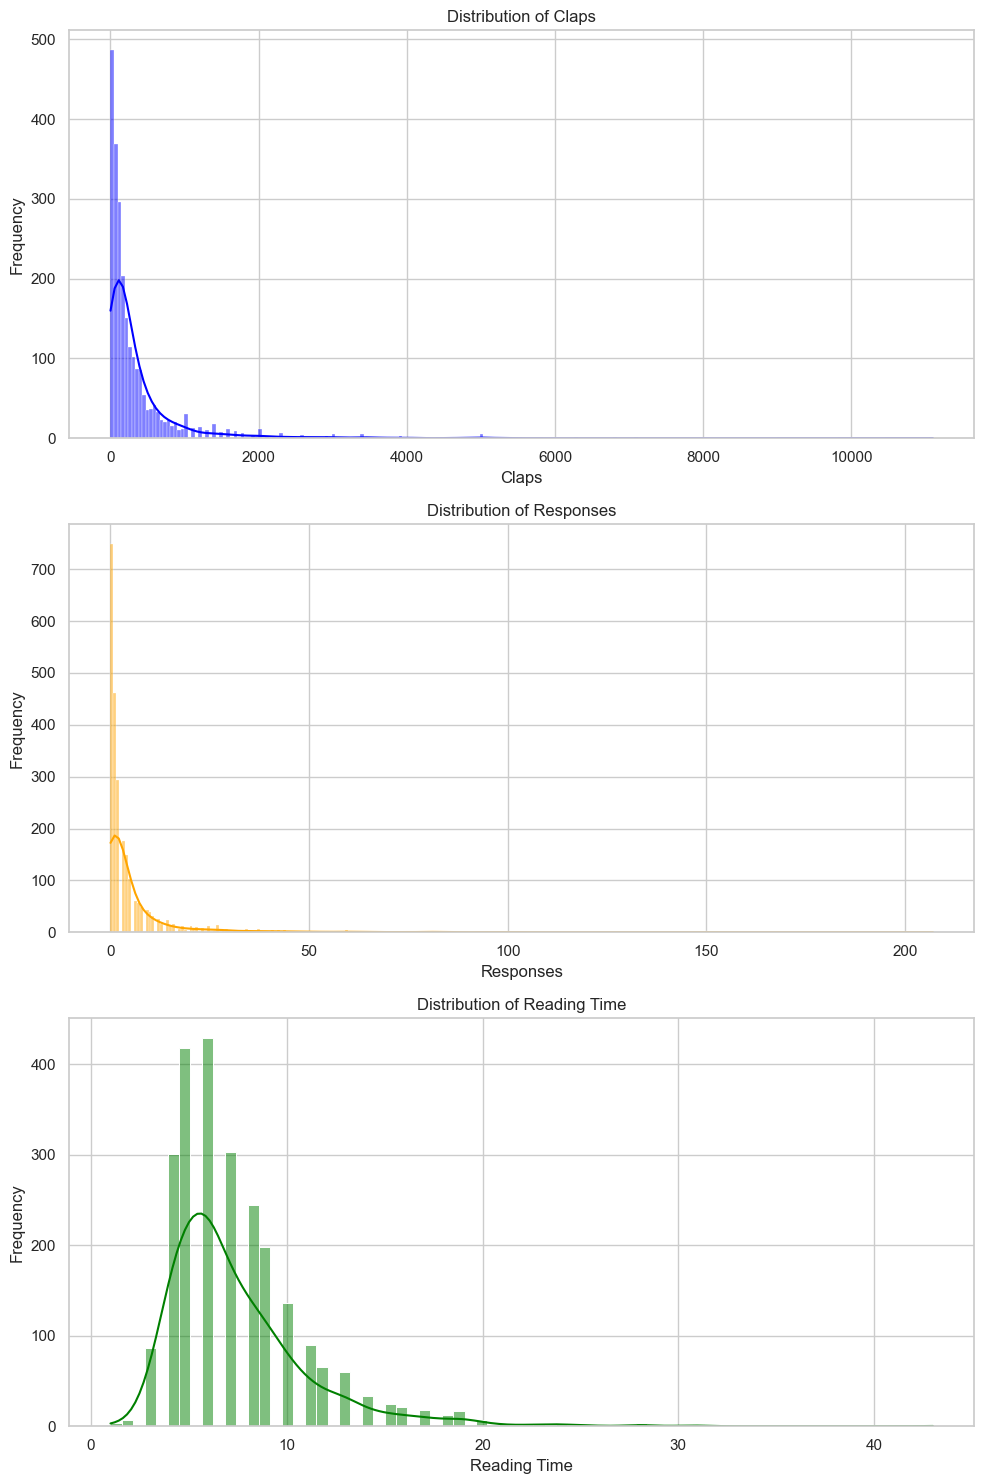

In [13]:
#
import matplotlib.pyplot as plt  
import seaborn as sns  

# Assuming 'data' is your DataFrame containing the dataset  
# data = pd.read_csv("path_to_your_file.csv")  # Load your dataset  

# Set the style  
sns.set(style="whitegrid")  

# Create subplots to visualize different numerical data  
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  

# Plotting the distribution of 'claps'  
sns.histplot(articles['claps'], kde=True, ax=axes[0], color='blue')  
axes[0].set_title('Distribution of Claps')  
axes[0].set_xlabel('Claps')  
axes[0].set_ylabel('Frequency')  

# Plotting the distribution of 'responses'  
sns.histplot(articles['responses'], kde=True, ax=axes[1], color='orange')  
axes[1].set_title('Distribution of Responses')  
axes[1].set_xlabel('Responses')  
axes[1].set_ylabel('Frequency')  

# Plotting the distribution of 'reading_time'  
sns.histplot(articles['reading_time'], kde=True, ax=axes[2], color='green')  
axes[2].set_title('Distribution of Reading Time')  
axes[2].set_xlabel('Reading Time')  
axes[2].set_ylabel('Frequency')  

# Adjust layout  
plt.tight_layout()  
plt.show()

* The graph is clearly right skewed.
* Hence most of articles in our corpus have a less reading time, with some articles having reading in hours.
* The median reading time is 9 minutes.

**How does the reading time relates with article length ?**


In [15]:
articles.columns

Index(['id', 'url', 'title', 'subtitle', 'claps', 'responses', 'reading_time',
       'publication', 'date'],
      dtype='object')

In [16]:
articles.tail(3)

,id,url,title,subtitle,claps,responses,reading_time,publication,date
2495,2496,https://writingcooperative.com/recognizing-the...,Recognizing These Three Realities Can Help Set...,NaN,410.0,10,4,The Writing Cooperative,29-01-2023
2496,2497,https://writingcooperative.com/i-remember-it-l...,“I Remember It Like It Was Just Yesterday…” Re...,The Role of Emotional Memory in Our Writing,461.0,7,7,The Writing Cooperative,29-01-2023
2497,2498,https://writingcooperative.com/how-to-formulat...,How to Formulate a Great Nonfiction Theme,There’s (almost) no such thing as too much tim...,158.0,2,5,The Writing Cooperative,29-01-2023


In [14]:
from scipy.stats import pearsonr  

articles["article_len"] = articles["text"].apply(lambda x: len(x))  
# creating scatterplot  
fig, axes = plt.subplots(figsize=(8, 6))  
sns.scatterplot(x=articles["reading_time"], y=articles["article_len"])  
# Pearson correlation coefficient measures the linear relationship between two set of values.  
corr_coeff, _ = pearsonr(articles["reading_time"], articles["article_len"])  
# plot title  
plt.suptitle("Reading Time vs. Article Length | Corr. Coeff : {}".format(round(corr_coeff, 2)))  
plt.show()

KeyError: 'text'